In [32]:
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0].shape

(28, 28)

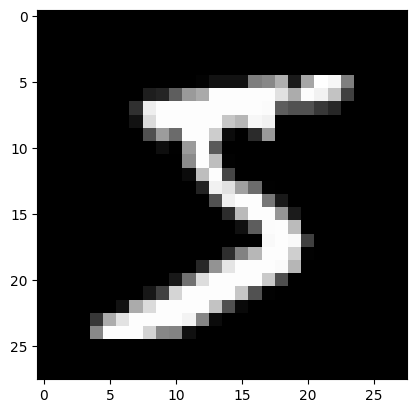

In [6]:
plt.imshow(X_train[0],cmap='gray')

In [7]:
y_train[0]

5

In [8]:
image_height, image_width= 28,28
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [11]:
X_train= X_train/255.0
X_test= X_test/255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
model = Sequential()
model.add(Dense(532, activation='relu', input_shape=(784,)))
model.add(Dense(532, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 532)               417620    
                                                                 
 dense_1 (Dense)             (None, 532)               283556    
                                                                 
 dense_2 (Dense)             (None, 10)                5330      
                                                                 
Total params: 706506 (2.70 MB)
Trainable params: 706506 (2.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
FC = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5674 - accuracy: 0.8593 - val_loss: 0.2939 - val_accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2752 - accuracy: 0.9228 - val_loss: 0.2335 - val_accuracy: 0.9333
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2241 - accuracy: 0.9364 - val_loss: 0.2000 - val_accuracy: 0.9426
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1897 - accuracy: 0.9463 - val_loss: 0.1739 - val_accuracy: 0.9499
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1642 - accuracy: 0.9531 - val_loss: 0.1558 - val_accuracy: 0.9532
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1445 - accuracy: 0.9591 - val_loss: 0.1431 - val_accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1289 - accuracy: 0.9638 - val_loss: 0.1312 - val_accurac

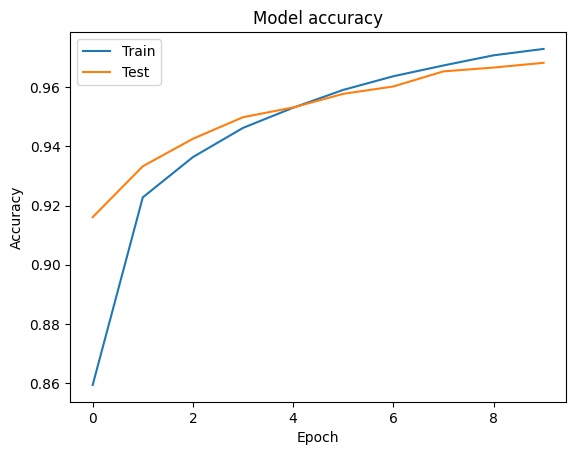

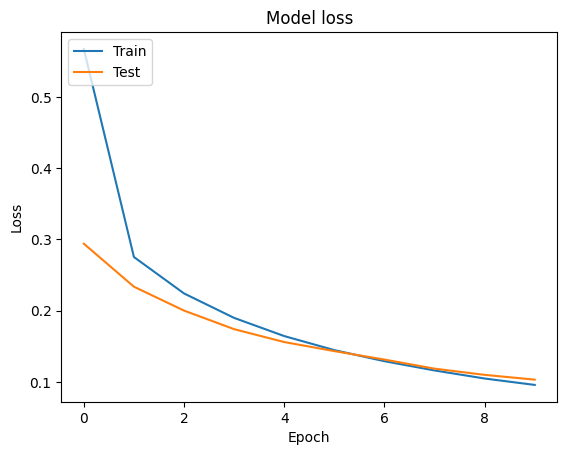

In [20]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_loss_accuracy(FC)

313/313 [==============================] - 1s 2ms/step


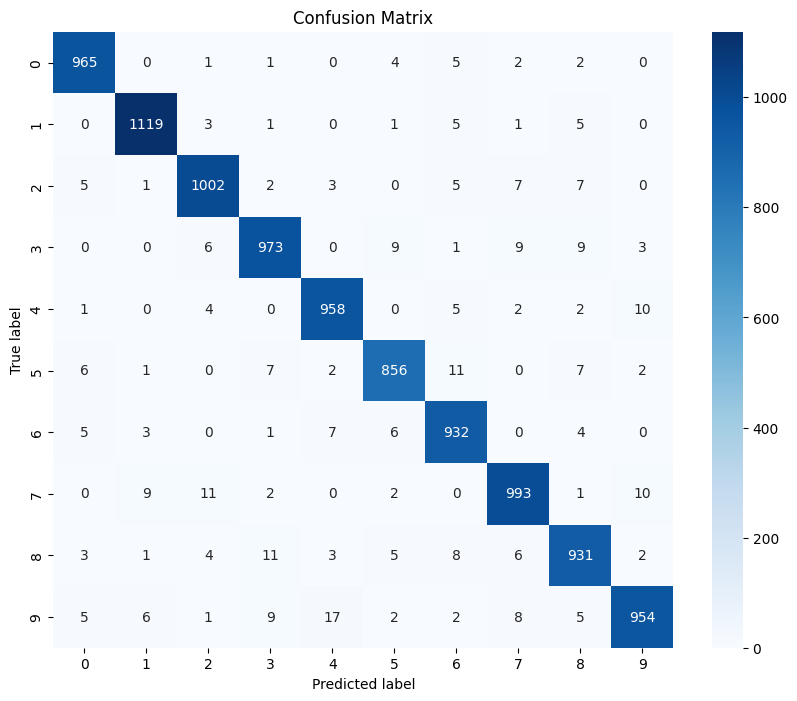

In [36]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class integers if they are not already
test_labels_integers = np.argmax(y_test, axis=1)

# Make predictions with the model
predictions = model.predict(X_test)

# Convert softmax output (probabilities) to discrete predictions (class integers)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix using integer labels
cm = confusion_matrix(test_labels_integers, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
